# Introduction

The goal of this notebook is to use data to understand the relationship between square footage of a dwelling and the dwelling's price.  AS we know, the size of a home is often one of the best predictors of the home price, especially when comparing homes in the general neighborhood.

The type of data you plan on using heavily influences the type of algorithm that's available to use. Additionally, it's usually a good idea to visualize the data before making any decision about what kind of algorithm to use.

First, let's import the necessary modules and then read in the data.

## Important Python Libraries for Data Science

In [1]:
# For organizing and manipulating data
import numpy as np
import pandas as pd

# For plotting graphs
import matplotlib.pyplot as plt

# For training the model
from sklearn import linear_model

# For evaluating model performance
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import r_regression

# Read Data

In [2]:
# Load the data set.
dataset_url = "https://raw.githubusercontent.com/papir805/Stanford-ML-Class/master/data/housing_data.csv"

# Use the first column in the .csv file as the dataframe's index
df = pd.read_csv(dataset_url, index_col=0)

In [3]:
# Check data loaded correctly
df.head()

,sq_ft (in hundreds),price (in thousands)
0,11.77,217.21
1,15.39,256.29
2,16.89,275.05
3,9.09,137.80
4,13.46,234.13


In [4]:
# How big is this data set?  That is, what is its length?
len(df)

500

In [5]:
# Store label names for x and y
x_label = 'sq_ft (in hundreds)'
y_label = 'price (in thousands)'

## Visualizing the Data

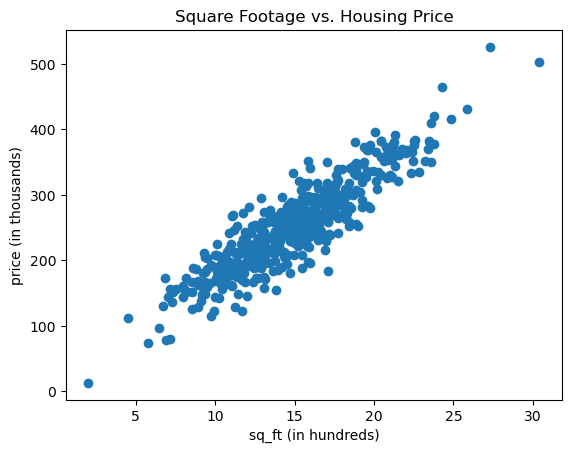

In [6]:
# Create figure and axis for graphing
# We are using commands that are available through the library "matplotlib"
fig, ax = plt.subplots(1, 1)

# Scatter plot of housing data
ax.scatter(x=df[x_label], y=df[y_label])
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title('Square Footage vs. Housing Price');

After visualizing the data, we no longer have to speculate about whether a relationship exists within our dataset; it's clear there's some kind of relationship between the square footage of a dwelling and its price.  More specifically, as the square footage of a dwelling goes up, the price of that dwelling tends to go up as well.

# Why Linear Regression?

Whenever a relationship in the data exists, regression is one common statistical tools that's available to help understand it.  Furthermore, regression can also be used to make predictions about unseen data, for instance predicting the price of a new dwelling based on it's square footage.  

Since it stands to reason that there's a relationship between the square footage of a property and its value, regression is probably a good choice.  However, the type of regression one choses to use depends on several factors.  

Linear regression is able to use any number of qualitative or quantitative inputs to predict a quantitative output.  **It can only predict a quantitative output**.  Because our goal is to predict the price of a dwelling, which is quantitative, linear regression can be used.  

**Note**: Using qualitative inputs involves a little more effort than quantitative inputs.  Also, using more than one input, whether qualitative or quantitative, adds complexity.  This notebook will first consider the simplest case of linear regression, when there's a single quantitative input, which in this case will be the square footage of a dwelling.  However, sections will be added to the notebook later to discuss how to deal with these situations.

Secondly, linear regression is most suited when the relationship between your inputs and outputs is...well, linear.  The scatter plot shows most of the points are clumped together in a linear fashion.  In other words, one could draw a line through the "center" of the points and most of the points would be pretty close to that line.  

In situations like these, where the data shows a linear pattern and when one wants to predict a single qualitative output, linear regression is appropriate.  From a mathematical standpoint, there are several more conditions to check before linear regression can be considered statistically sound enough for use, but these are beyond the scope of this notebook.

# Training the Linear Regression Model

In the case of using a single input (x) to predict a qualitative output (y), the model will look like your friendly linear function from algebra class in high school: $$y=m \cdot x+b$$

However, because most datasets are incomplete, it's unlikely one will ever have enough information to create a linear model that's the most accurate representation of your data.  Without complete data, you won't know what the slope or the y-intercept should be.  That being said, the goal isn't to go for exactness or perfection, but opt for estimation instead, which is why the model is more commonly written in this form: $$\hat y = \beta_1 \cdot x + \beta_0$$

where $\hat y$ represents the **predicted** output and $\beta_1$ and $\beta_0$ represent the **estimated** slope and **estimated** y-intercept, respectively.  

In [7]:
# Create linear regression object
lin_reg_model = linear_model.LinearRegression()

# Train the model using the training dataset
lin_reg_model = lin_reg_model.fit(df[[x_label]], df[[y_label]])

# The slope
beta_1 = lin_reg_model.coef_[0][0]
print(f"Estimated Slope: {beta_1:.2f}")

# The y-intercept
beta_0 = lin_reg_model.intercept_[0]
print(f"Estimated y-intercept: {beta_0:.2f}")

Estimated Slope: 15.73
Estimated y-intercept: 17.93


Based on the training data, the model has estimated the slope and y-intercept.  Using the values from above, the model will look like: $$\hat y = 15.73x + 17.93$$

The positive slope indicates a positive relationship between x (sq_ft in hundreds) and y (price in thousands).  This was observed earlier in the scatter plot when it was noted that as the square footage of a dwelling increased, the price of that dwelling tended to increase too.  

In linear regression, the slope means that for every increase in one unit of x will increase y by an amount equal to the slope.  For this example, a slope of 15.73 means when the sq_ft is increased by 1 (hundred), the price increases by 15.73 (thousand).  

The y-intercept tells you what the predicted y-value is when x is 0.  In this case, the y-intercept predicts that when the square footage of a dwelling is 0 (hundred), the price is estimated to be 17.93 (thousand).

# Evaluating model performance

## Making Predictions

Now that the model has been trained, it can be used to make predictions.

We will define two new variables to be see how well the model works.  The first is y_predicted, which will have the predicted value from the the model.  The second is y_true, which is simply a copy of the original data point from the data set we loaded.

In [8]:
y_predicted = 'predicted_price (in thousands)'
y_true = 'true_price (in thousands)'

In [9]:
# Make predictions
predictions = lin_reg_model.predict(df[[x_label]])
predictions = np.round(predictions, 2)

# Store results in dataframe
results_df = pd.DataFrame({x_label:df[x_label],
                                y_true:df[y_label],
                                y_predicted:predictions.flatten()})
results_df.head()

,sq_ft (in hundreds),true_price (in thousands),predicted_price (in thousands)
0,11.77,217.21,203.03
1,15.39,256.29,259.96
2,16.89,275.05,283.55
3,9.09,137.80,160.88
4,13.46,234.13,229.60


Remembering the linear model from earlier, the results_df from above can be explained.  For the first entry, $\text{sq_ft}=11.77$ hundred.  Plugging this value into the model would look as follows:

$$\hat y = 15.73x + 17.93$$

$$\hat y = 15.73(11.77) + 17.93$$

$$\hat y = 203.03$$

The result is the predicted price of 203.03 thousand, however the true price was $y=217.21$ thousand.  Doing this for every sq_ft value in the dataset leads to many $(x, \hat y)$ pairs, the sq_ft and a *predicted* price, which can then be graphed and compared to the $(x, y)$ pairs from the dataset itself, representing the sq_ft in hundreds and the *true* price in thousands.

## Visualizing the Linear Model's Fit

In the graph below, each point on the red line represents the $(x, \hat y)$ pairs  containing the predicted prices, while the blue dots represent the $(x, y)$ pairs have the actual prices.  

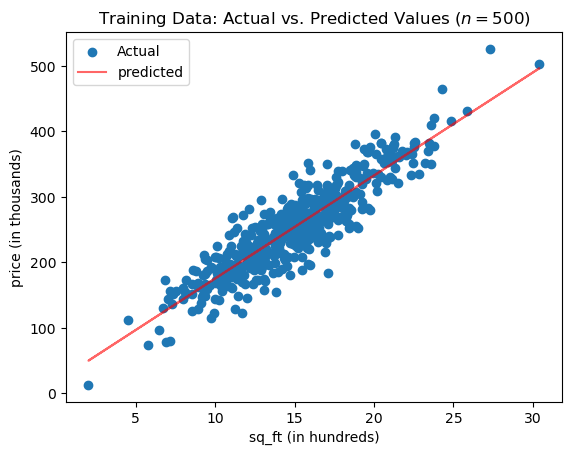

In [10]:
# Number of data points
sample_size = df[[x_label]].shape[0]

# Create figure and axis for graphing
fig, ax = plt.subplots(1, 1)

# Scatter plot of data
ax.scatter(x=df[[x_label]], y=df[[y_label]], label='Actual')

# Linear model's trend line
ax.plot(df[[x_label]], predictions, color='r', label='predicted', alpha=0.6)

ax.set_title(f'Training Data: Actual vs. Predicted Values ($n={sample_size})$')
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.legend();

The scatter plot now shows the regression line and it fits the dataset reasonably well.  Most of the points are clumped around that line.  

# Conclusion